In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer ## to creae bag of words

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import (
    f1_score,
    accuracy_score,   
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,

    classification_report,
    precision_recall_curve
)


In [16]:
talents = pd.read_csv("potential-talents - Aspiring human resources - seeking human resources.csv")
talents

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


In [17]:
talents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [18]:
job_title = talents['job_title']
job_title

0      2019 C.T. Bauer College of Business Graduate (...
1      Native English Teacher at EPIK (English Progra...
2                  Aspiring Human Resources Professional
3                 People Development Coordinator at Ryan
4        Advisory Board Member at Celal Bayar University
                             ...                        
99     Aspiring Human Resources Manager | Graduating ...
100                Human Resources Generalist at Loparex
101     Business Intelligence and Analytics at Travelers
102                       Always set them up for Success
103     Director Of Administration at Excellence Logging
Name: job_title, Length: 104, dtype: object

In [19]:
## clean the text and convert it to lower case
def clean_text(job_titles):
    ps = PorterStemmer()
    employee_titles = []
    for i in range(0, len(job_titles)):
        titles = re.sub('[^a-zA-Z]', ' ', job_titles[i])
        titles = titles.lower()
        titles = titles.split()
        titles = [word for word in titles if not word in stopwords.words('english')]
        titles = ' '.join(titles)
        employee_titles.append(titles)
    return employee_titles

In [20]:
titles_clean = clean_text(job_title)
titles_clean

['c bauer college business graduate magna cum laude aspiring human resources professional',
 'native english teacher epik english program korea',
 'aspiring human resources professional',
 'people development coordinator ryan',
 'advisory board member celal bayar university',
 'aspiring human resources specialist',
 'student humber college aspiring human resources generalist',
 'hr senior specialist',
 'student humber college aspiring human resources generalist',
 'seeking human resources hris generalist positions',
 'student chapman university',
 'svp chro marketing communications csr officer engie houston woodlands energy gphr sphr',
 'human resources coordinator intercontinental buckhead atlanta',
 'c bauer college business graduate magna cum laude aspiring human resources professional',
 'c bauer college business graduate magna cum laude aspiring human resources professional',
 'native english teacher epik english program korea',
 'aspiring human resources professional',
 'people d

In [21]:
## this will be the input of user 
key1 = clean_text(["Aspiring human resources"])
key2 = clean_text(["seeking human resources"])
key2

['seeking human resources']

In [22]:
## extract all keywords, freez itn now
key_words = []
for sent in keys:
    for word in sent.split(' '):
        if word not in key_words:
            key_words.append(word)
key_words = [' '.join(key_words)]
key_words

['aspiring human resources seeking']

In [24]:
## lets vectorize oure sentance.

cv = CountVectorizer()
X= cv.fit_transform(titles_clean).toarray()
key_words = cv.transform(key_words).toarray()

In [25]:
len(X)

104

In [26]:
X.shape

(104, 180)

In [34]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
key_words

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]], dtype=int64)

In [28]:
key_words.shape

(1, 180)

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
##find the simlarity between each job describtion and the kewords
title_keys_sim = cosine_similarity(X, key_words)
len(title_keys_sim)

104

In [33]:
title_keys_sim = cosine_similarity(X, X[-1].reshape(-1, 1))

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 180 while Y.shape[1] == 1

In [16]:
talents_modify = talents.copy()


In [17]:
talents_modify['keys_sim'] = title_keys_sim
talents_modify.sort_values(by= ['keys_sim'],ascending=False)

,id,job_title,location,connection,fit,keys_sim
72,73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,NaN,0.866025
28,29,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,NaN,0.755929
26,27,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,NaN,0.755929
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.750000
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.750000
...,...,...,...,...,...,...
21,22,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000
19,20,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.000000
47,48,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.000000
17,18,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000


In [18]:
talents_modify.drop(['job_title', 'fit', 'id'], axis=1, inplace=True)

In [19]:
## fill label field with 1 if similarity is larger than 0.5 and 0 for the remaining
talents_modify['label'] = np.where(talents_modify['keys_sim'] >= 0.5, 1, 0)


In [20]:
talents_modify


,location,connection,keys_sim,label
0,"Houston, Texas",85,0.452267,0
1,Kanada,500+,0.000000,0
2,"Raleigh-Durham, North Carolina Area",44,0.750000,1
3,"Denton, Texas",500+,0.000000,0
4,"İzmir, Türkiye",500+,0.000000,0
...,...,...,...,...
99,"Cape Girardeau, Missouri",103,0.707107,1
100,"Raleigh-Durham, North Carolina Area",500+,0.500000,1
101,Greater New York City Area,49,0.000000,0
102,Greater Los Angeles Area,500+,0.000000,0


In [22]:
le = LabelEncoder()
le.fit(talents_modify['location']) 
keys_l = le.classes_
values_l = le.transform(keys_l)
my_dict = dict(zip(keys_l, values_l))
talents_modify['location'] = talents_modify['location'].replace(my_dict)
talents_modify

,location,connection,keys_sim,label
0,20,85,0.452267,0
1,23,500+,0.000000,0
2,35,44,0.750000,1
3,10,500+,0.000000,0
4,40,500+,0.000000,0
...,...,...,...,...
99,6,103,0.707107,1
100,35,500+,0.500000,1
101,17,49,0.000000,0
102,16,500+,0.000000,0


In [23]:
talents_modify['connection'] = talents_modify['connection'].str.replace('+', '')
talents_modify['connection'] = talents_modify['connection'].astype(int)

C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_1756\432711726.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  talents_modify['connection'] = talents_modify['connection'].str.replace('+', '')


In [24]:
talents_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    104 non-null    int32  
 1   connection  104 non-null    int32  
 2   keys_sim    104 non-null    float64
 3   label       104 non-null    int32  
dtypes: float64(1), int32(3)
memory usage: 2.2 KB


In [25]:
talents_modify

,location,connection,keys_sim,label
0,20,85,0.452267,0
1,23,500,0.000000,0
2,35,44,0.750000,1
3,10,500,0.000000,0
4,40,500,0.000000,0
...,...,...,...,...
99,6,103,0.707107,1
100,35,500,0.500000,1
101,17,49,0.000000,0
102,16,500,0.000000,0


In [26]:
yd= talents_modify['label'] 
Xd= talents_modify.drop(['label'], axis=1)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(Xd, yd, test_size=0.15, random_state=12)


In [28]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)

LogisticRegression()

In [29]:
pred_test = lg.predict(X_test)

In [30]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.78      0.88         9

    accuracy                           0.88        16
   macro avg       0.89      0.89      0.88        16
weighted avg       0.90      0.88      0.88        16



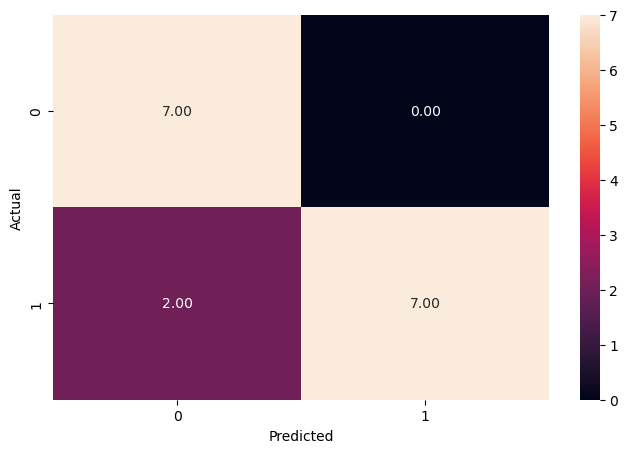

In [31]:
metrics_score(pred_test, Y_test)

In [32]:
## find the prbabilities
probs = lg.predict_proba(Xd)
talents_modify['probs_lg'] = probs[:,1]


In [33]:
talents_modify.sort_values(by=['probs_lg'], ascending=False)

,location,connection,keys_sim,label,probs_lg
72,21,7,0.866025,1,0.876798
59,17,1,0.750000,1,0.821707
35,17,1,0.750000,1,0.821707
5,17,1,0.750000,1,0.821707
23,17,1,0.750000,1,0.821707
...,...,...,...,...,...
50,36,500,0.000000,0,0.075158
22,40,500,0.000000,0,0.073959
34,40,500,0.000000,0,0.073959
4,40,500,0.000000,0,0.073959


In [34]:
talents_modify['job'] = talents['job_title']
talents_modify.sort_values(by=['probs_lg'], ascending=False).head(50)

,location,connection,keys_sim,label,probs_lg,job
72,21,7,0.866025,1,0.876798,"Aspiring Human Resources Manager, seeking inte..."
59,17,1,0.750000,1,0.821707,Aspiring Human Resources Specialist
35,17,1,0.750000,1,0.821707,Aspiring Human Resources Specialist
5,17,1,0.750000,1,0.821707,Aspiring Human Resources Specialist
23,17,1,0.750000,1,0.821707,Aspiring Human Resources Specialist
48,17,1,0.750000,1,0.821707,Aspiring Human Resources Specialist
98,28,48,0.750000,1,0.800556,Seeking Human Resources Position
45,35,44,0.750000,1,0.796906,Aspiring Human Resources Professional
57,35,44,0.750000,1,0.796906,Aspiring Human Resources Professional
20,35,44,0.750000,1,0.796906,Aspiring Human Resources Professional


In [35]:
### lets select an employee then find the smilarity beween all employees and the selected one

In [36]:
talents_02 = talents.copy()
talents_02.drop(['job_title', 'fit', 'id'], axis=1,inplace=True)


In [37]:
le = LabelEncoder()
le.fit(talents_02['location']) 
keys_l = le.classes_
values_l = le.transform(keys_l)
my_dict = dict(zip(keys_l, values_l))
talents_02['location'] = talents_02['location'].replace(my_dict)
talents_02

,location,connection
0,20,85
1,23,500+
2,35,44
3,10,500+
4,40,500+
...,...,...
99,6,103
100,35,500+
101,17,49
102,16,500+


In [39]:
talents_02['titel'] = X.tolist() # X is the bag words 

In [40]:
talents_02['selected'] =0
talents_02['connection'] = talents_02['connection'].str.replace('+', '')
talents_02['connection'] = talents_02['connection'].astype(int)
talents_02

C:\Users\abdullahq.MOLG0\AppData\Local\Temp\ipykernel_1756\2651649167.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  talents_02['connection'] = talents_02['connection'].str.replace('+', '')


,location,connection,titel,selected
0,20,85,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",0
1,23,500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,35,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0
3,10,500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
4,40,500,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0
...,...,...,...,...
99,6,103,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0
100,35,500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
101,17,49,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
102,16,500,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


In [41]:
## lets selct emlploye 96 
talents_02.loc[[96], 'selected'] = 1


In [42]:
## i want the system to selct al 1s then calculate the similarity 
selected_list = talents_02[talents_02['selected'] == 1].index.tolist()
selected_list


[96]

In [43]:
selected_victors = np.array([talents_02.loc[i,'titel'] for i in selected_list])
selected_victors

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [44]:
X.shape

(104, 171)

In [45]:
selected_victors.shape

(1, 171)

In [49]:
cosine_sim = cosine_similarity(X, selected_victors)

In [50]:
accomulated_similarity = (cosine_sim +title_keys_sim)/2

In [51]:
talents_02['accomulated_similarity'] = accomulated_similarity



In [53]:
talents_02.sort_values(by=['accomulated_similarity'], ascending=False).head(10)

,location,connection,titel,selected,accomulated_similarity
20,35,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.875000
96,25,71,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,0.875000
32,35,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.875000
57,35,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.875000
16,35,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.875000
45,35,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.875000
2,35,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.875000
72,21,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.793857
23,17,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.750000
35,17,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.750000


In [54]:
## fill label field with 1 if similarity is larger than 0.5 and 0 for the remaining
talents_02['label'] = np.where(talents_02['accomulated_similarity'] >= 0.5, 1, 0)


In [55]:
talents_03 = talents_02.copy()

In [56]:
talents_02.drop(['titel'], axis=1, inplace=True)

In [57]:
yd2 = talents_02['label']
Xd2 = talents_02.drop(['label'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(Xd2, yd2, test_size=0.15, random_state=12)


              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.78      0.88         9

    accuracy                           0.88        16
   macro avg       0.89      0.89      0.88        16
weighted avg       0.90      0.88      0.88        16



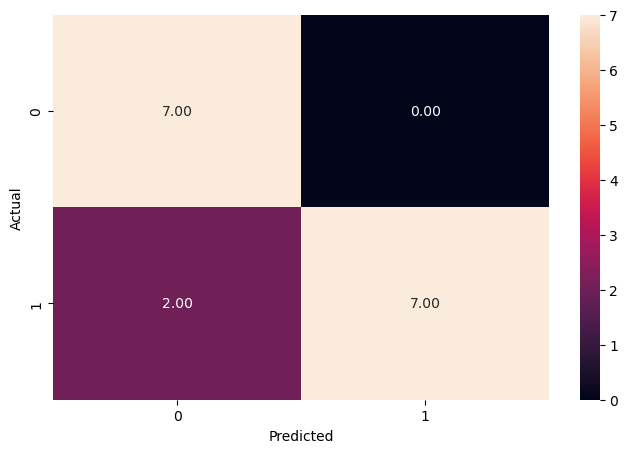

In [58]:
lg.fit(X_train, Y_train)
pred_test = lg.predict(X_test)
metrics_score(pred_test, Y_test)

In [59]:
## find the prbabilities
probs = lg.predict_proba(Xd2)
talents_02['probs_lg'] = probs[:,1]
talents_02.sort_values(by=['probs_lg'], ascending=False).head(10)

,location,connection,selected,accomulated_similarity,label,probs_lg
2,35,44,0,0.875000,1,0.940191
20,35,44,0,0.875000,1,0.940191
45,35,44,0,0.875000,1,0.940191
57,35,44,0,0.875000,1,0.940191
16,35,44,0,0.875000,1,0.940191
32,35,44,0,0.875000,1,0.940191
96,25,71,1,0.875000,1,0.934594
72,21,7,0,0.793857,1,0.921440
48,17,1,0,0.750000,1,0.907074
35,17,1,0,0.750000,1,0.907074


In [60]:
talents_recomend = talents_02.copy()
talents_recomend

,location,connection,selected,accomulated_similarity,label,probs_lg
0,20,85,0,0.527645,1,0.754690
1,23,500,0,0.000000,0,0.102502
2,35,44,0,0.875000,1,0.940191
3,10,500,0,0.000000,0,0.099252
4,40,500,0,0.000000,0,0.106893
...,...,...,...,...,...,...
99,6,103,0,0.648181,1,0.825758
100,35,500,0,0.500000,1,0.500853
101,17,49,0,0.000000,0,0.258770
102,16,500,0,0.000000,0,0.100740


In [62]:
## remove the selceted from the new recomendation
talents_recomend = talents_recomend[talents_recomend['selected'] != 1]
talents_recomend

,location,connection,selected,accomulated_similarity,label,probs_lg
0,20,85,0,0.527645,1,0.754690
1,23,500,0,0.000000,0,0.102502
2,35,44,0,0.875000,1,0.940191
3,10,500,0,0.000000,0,0.099252
4,40,500,0,0.000000,0,0.106893
...,...,...,...,...,...,...
99,6,103,0,0.648181,1,0.825758
100,35,500,0,0.500000,1,0.500853
101,17,49,0,0.000000,0,0.258770
102,16,500,0,0.000000,0,0.100740


In [66]:
talents_recomend.sort_values(by=['probs_lg'], ascending=False).head(15)

,location,connection,selected,accomulated_similarity,label,probs_lg
32,35,44,0,0.875000,1,0.940191
2,35,44,0,0.875000,1,0.940191
45,35,44,0,0.875000,1,0.940191
20,35,44,0,0.875000,1,0.940191
57,35,44,0,0.875000,1,0.940191
16,35,44,0,0.875000,1,0.940191
72,21,7,0,0.793857,1,0.921440
35,17,1,0,0.750000,1,0.907074
23,17,1,0,0.750000,1,0.907074
48,17,1,0,0.750000,1,0.907074


In [879]:
### enhance the model to be general for any number of selected variables

In [65]:
talents_03 


,location,connection,titel,selected,accomulated_similarity,label
0,20,85,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",0,0.527645,1
1,23,500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.000000,0
2,35,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.875000,1
3,10,500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.000000,0
4,40,500,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0,0.000000,0
...,...,...,...,...,...,...
99,6,103,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.648181,1
100,35,500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.500000,1
101,17,49,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.000000,0
102,16,500,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.000000,0


In [67]:
## lets select new emloyee to see new order
talents_03.loc[[59], 'selected'] = 1


In [68]:
selected_list = talents_03[talents_03['selected'] == 1].index.tolist()
selected_list = [selected_list[0]]
selected_list

[59]

In [69]:
selected_victors = np.array([talents_03.loc[i,'titel'] for i in selected_list])
selected_victors.shape


(1, 171)

In [70]:
X.shape

(104, 171)

In [71]:
cosine_sim = cosine_similarity(X, selected_victors)
len(cosine_sim)

104

In [72]:
cosine_sim_ravel = np.ravel(cosine_sim)
cosine_sim_ravel.shape

(104,)

In [73]:
talents_03['accomulated_similarity'] = (talents_03['accomulated_similarity'] + cosine_sim_ravel)/2

In [74]:
talents_03

,location,connection,titel,selected,accomulated_similarity,label
0,20,85,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",0,0.489956,1
1,23,500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.000000,0
2,35,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.812500,1
3,10,500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.000000,0
4,40,500,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0,0.000000,0
...,...,...,...,...,...,...
99,6,103,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,0.618718,1
100,35,500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.500000,1
101,17,49,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.000000,0
102,16,500,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.000000,0


In [79]:
talents_03['label'] = np.where(talents_03['accomulated_similarity'] >= 0.5, 1, 0)


In [80]:
talents_03.drop(['titel'], axis=1, inplace=True)

KeyError: "['titel'] not found in axis"

In [83]:
yd2 = talents_03['label']
Xd2 = talents_03.drop(['label'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(Xd2, yd2, test_size=0.15, random_state=12)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.75      0.86         4

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.91        16
weighted avg       0.94      0.94      0.93        16



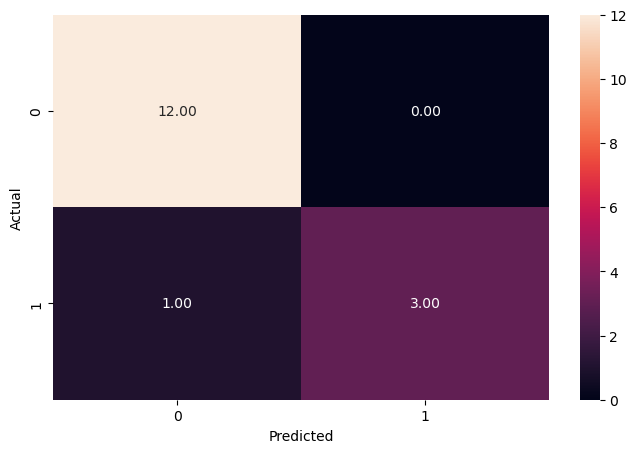

In [84]:
lg.fit(X_train, Y_train)
pred_test = lg.predict(X_test)
metrics_score(pred_test, Y_test)

In [85]:
## find the prbabilities
probs2 = lg.predict_proba(Xd2)
talents_03['probs_lg'] = probs2[:,1]
talents_03.sort_values(by=['accomulated_similarity'], ascending=False).head(10)

,location,connection,selected,accomulated_similarity,label,probs_lg
23,17,1,0,0.8750,1,0.872432
59,17,1,1,0.8750,1,0.886614
35,17,1,0,0.8750,1,0.872432
5,17,1,0,0.8750,1,0.872432
48,17,1,0,0.8750,1,0.872432
16,35,44,0,0.8125,1,0.788716
57,35,44,0,0.8125,1,0.788716
32,35,44,0,0.8125,1,0.788716
20,35,44,0,0.8125,1,0.788716
45,35,44,0,0.8125,1,0.788716


In [86]:
talents_03.sort_values(by=['probs_lg'], ascending=False).head(10)

,location,connection,selected,accomulated_similarity,label,probs_lg
59,17,1,1,0.875000,1,0.886614
48,17,1,0,0.875000,1,0.872432
35,17,1,0,0.875000,1,0.872432
23,17,1,0,0.875000,1,0.872432
5,17,1,0,0.875000,1,0.872432
96,25,71,1,0.812500,1,0.824591
72,21,7,0,0.757772,1,0.802990
45,35,44,0,0.812500,1,0.788716
20,35,44,0,0.812500,1,0.788716
16,35,44,0,0.812500,1,0.788716


In [87]:
## find the prbabilities for previous state where oly 96 is selected

talents_02.sort_values(by=['probs_lg'], ascending=False).head(10)

,location,connection,selected,accomulated_similarity,label,probs_lg
2,35,44,0,0.875000,1,0.940191
20,35,44,0,0.875000,1,0.940191
45,35,44,0,0.875000,1,0.940191
57,35,44,0,0.875000,1,0.940191
16,35,44,0,0.875000,1,0.940191
32,35,44,0,0.875000,1,0.940191
96,25,71,1,0.875000,1,0.934594
72,21,7,0,0.793857,1,0.921440
48,17,1,0,0.750000,1,0.907074
35,17,1,0,0.750000,1,0.907074


In [88]:
talents_02.sort_values(by=['accomulated_similarity'], ascending=False).head(10)

,location,connection,selected,accomulated_similarity,label,probs_lg
20,35,44,0,0.875000,1,0.940191
96,25,71,1,0.875000,1,0.934594
32,35,44,0,0.875000,1,0.940191
57,35,44,0,0.875000,1,0.940191
16,35,44,0,0.875000,1,0.940191
45,35,44,0,0.875000,1,0.940191
2,35,44,0,0.875000,1,0.940191
72,21,7,0,0.793857,1,0.921440
23,17,1,0,0.750000,1,0.907074
35,17,1,0,0.750000,1,0.907074


In [89]:
## cold start with no selectef employees
talents_modify.sort_values(by=['probs_lg'], ascending=False)

,location,connection,keys_sim,label,probs_lg,job
72,21,7,0.866025,1,0.876798,"Aspiring Human Resources Manager, seeking inte..."
59,17,1,0.750000,1,0.821707,Aspiring Human Resources Specialist
35,17,1,0.750000,1,0.821707,Aspiring Human Resources Specialist
5,17,1,0.750000,1,0.821707,Aspiring Human Resources Specialist
23,17,1,0.750000,1,0.821707,Aspiring Human Resources Specialist
...,...,...,...,...,...,...
50,36,500,0.000000,0,0.075158,HR Senior Specialist
22,40,500,0.000000,0,0.073959,Advisory Board Member at Celal Bayar University
34,40,500,0.000000,0,0.073959,Advisory Board Member at Celal Bayar University
4,40,500,0.000000,0,0.073959,Advisory Board Member at Celal Bayar University


In [90]:
talents_modify.sort_values(by=['keys_sim'], ascending=False)

,location,connection,keys_sim,label,probs_lg,job
72,21,7,0.866025,1,0.876798,"Aspiring Human Resources Manager, seeking inte..."
28,21,500,0.755929,1,0.639763,Aspiring Human Resources Management student se...
26,21,500,0.755929,1,0.639763,Aspiring Human Resources Management student se...
16,35,44,0.750000,1,0.796906,Aspiring Human Resources Professional
57,35,44,0.750000,1,0.796906,Aspiring Human Resources Professional
...,...,...,...,...,...,...
21,10,500,0.000000,0,0.083393,People Development Coordinator at Ryan
19,23,500,0.000000,0,0.079178,Native English Teacher at EPIK (English Progra...
47,40,500,0.000000,0,0.073959,Advisory Board Member at Celal Bayar University
17,10,500,0.000000,0,0.083393,People Development Coordinator at Ryan


In [3]:
from transformers import SentenceTransformer as Transformer

ImportError: cannot import name 'SentenceTransformer' from 'transformers' (C:\Users\abdullahq.MOLG0\Anaconda3\lib\site-packages\transformers\__init__.py)

In [2]:
pip install transformers

  Using cached transformers-4.26.0-py3-none-any.whl (6.3 MB)
  Using cached huggingface_hub-0.12.0-py3-none-any.whl (190 kB)
Note: you may need to restart the kernel to use updated packages.
